In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import copy

In [2]:
filepath = '/Users/dangoldberg/Desktop/DataScienceInterviewProjects/Toronto Blue Jays/catcherframe.csv'

In [3]:
df = pd.read_csv(filepath)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342506 entries, 0 to 342505
Data columns (total 27 columns):
parkid               342506 non-null int64
bluejaysgameid       342506 non-null object
gamepitchsequence    342506 non-null int64
half                 342506 non-null int64
balls                342506 non-null int64
strikes              342506 non-null int64
pitcherid            342506 non-null int64
pitcherhand          342506 non-null object
batterid             342506 non-null int64
batside              342506 non-null object
catcherid            342506 non-null int64
pitchtype            342506 non-null object
relspeed             342506 non-null float64
hbreak               342506 non-null float64
vbreak               342506 non-null float64
plate_x              342506 non-null float64
plate_z              342506 non-null float64
calledstrike         342506 non-null int64
ball                 342506 non-null int64
swings               342506 non-null int64
takes          

In [6]:
df.sample(20)

,parkid,bluejaysgameid,gamepitchsequence,half,balls,strikes,pitcherid,pitcherhand,batterid,batside,...,calledstrike,ball,swings,takes,pitchout,intentball,inplay,pitcheventtype,hbp,ump_hp
145663,226,A47EEC29-5CAA-47AE-8445-995F308B8EFC,251,1,1,0,3728,R,7727,L,...,1,0,0,1,0,0,0,called_strike,0,141338.0
299489,454,41D79511-89E8-4C4C-BED5-4044C444AEF5,71,0,1,0,4528,L,6776,L,...,1,0,0,1,0,0,0,called_strike,0,121745.0
170167,265,1B0EAED8-4C55-4946-9C90-86ED9E5518E5,127,1,2,1,5286,R,6897,R,...,0,0,1,0,0,0,0,foul,0,143717.0
3673,5,1D9FC0B7-4016-4DB2-A66C-B0F8FE6D858F,89,1,3,2,120988,R,5367,L,...,0,0,1,0,0,0,1,hit_into_play,0,154430.0
323450,3914,11814A0F-5B7D-46D1-8845-A5D36B928F34,123,0,1,1,120650,L,4296,R,...,0,1,0,1,0,0,0,ball,0,139590.0
89183,80,04DE87C7-C0BF-4281-91A3-03C253736A4C,137,0,0,1,1479,L,2740,R,...,0,0,1,0,0,0,0,foul,0,156580.0
115535,89,E8882FBD-68AC-4BD9-9C65-949609137E23,269,0,2,2,10744,R,162150,L,...,0,1,0,1,0,0,0,ball,0,NaN
96841,81,2F4EA23C-24F5-4225-BE4F-F35E2422C49B,20,0,0,0,10259,R,1242,R,...,1,0,0,1,0,0,0,called_strike,0,136657.0
222226,387,1477712E-4441-479D-B447-7ACCEBC98F73,90,1,1,0,169583,R,3364,R,...,0,0,1,0,0,0,0,foul,0,NaN
304071,496,27B1A0B5-EC8A-46C5-91D0-BC693A5D582F,273,1,3,2,100977,R,2169,R,...,0,1,0,1,0,0,0,ball,0,NaN


In [15]:
called_pitches = df[(df['swings'] == 0) & (df['intentball'] == 0) & (df['hbp'] == 0) & (df['pitchout'] == 0)]

/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


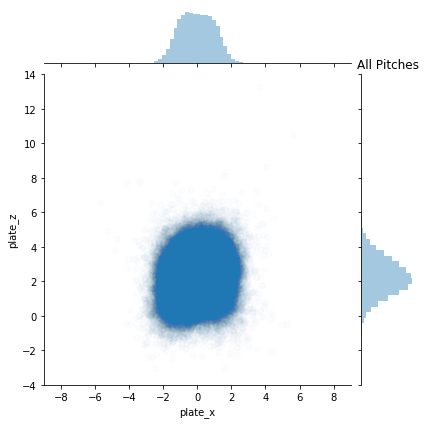

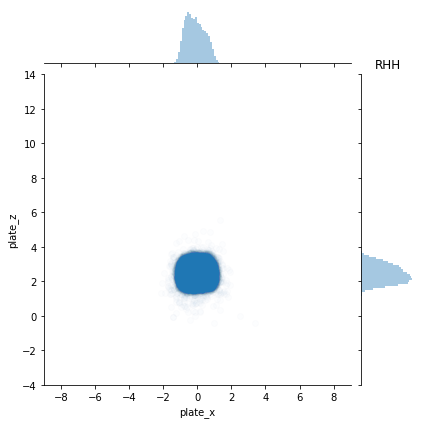

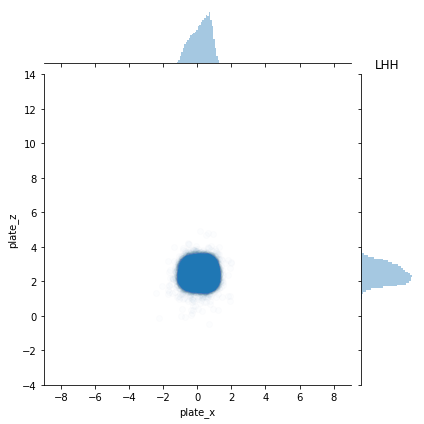

In [16]:
sns.jointplot("plate_x","plate_z",data=called_pitches,xlim=[-9,9],ylim=[-4,14],alpha=0.01)
plt.title('All Pitches')
plt.show()
sns.jointplot("plate_x","plate_z",data=called_pitches[(called_pitches['batside'] == 'R') & (called_pitches['calledstrike'] == 1)],xlim=[-9,9],ylim=[-4,14],alpha=0.01)
plt.title('RHH')
plt.show()
sns.jointplot("plate_x","plate_z",data=called_pitches[(called_pitches['batside'] == 'L') & (called_pitches['calledstrike'] == 1)],xlim=[-9,9],ylim=[-4,14],alpha=0.01)
plt.title('LHH')
plt.show()

In [19]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from scipy.ndimage.filters import gaussian_filter

In [20]:
df['batside'].unique()

array(['R', 'L'], dtype=object)

In [21]:
def make_heatmap(x, y, bins):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[[-4, 4], [0, 8]], density=False)
    return heatmap, xedges, yedges

def prepare_dataset(called_pitches, bins=100, s=1):
    
    called_balls = called_pitches[called_pitches['ball'] == 1][['plate_x','plate_z','calledstrike']]
    called_strikes = called_pitches[called_pitches['calledstrike'] == 1][['plate_x','plate_z','calledstrike']]

    balls_map, balls_xedges, balls_yedges = make_heatmap(called_balls['plate_x'].values, called_balls['plate_z'].values, bins=bins)
    balls_map = np.flip(balls_map.T,axis=0)
    strikes_map, _, _ = make_heatmap(called_strikes['plate_x'].values, called_strikes['plate_z'].values, bins=bins)
    strikes_map = np.flip(strikes_map.T,axis=0)

    totals_map = balls_map + strikes_map
    totals_normed_map = totals_map / called_pitches.shape[0]

    strike_probabilites_map = np.nan_to_num(strikes_map / totals_map)
    balls_probabilites_map = np.nan_to_num(balls_map / totals_map)

    probabilities_difference_map = (strike_probabilites_map * 2) - 1

    strikes_map = gaussian_filter(strikes_map, sigma=s)
    balls_map = gaussian_filter(balls_map, sigma=s)
    totals_normed_map = gaussian_filter(totals_map, sigma=s)
    strike_probabilites_map = gaussian_filter(strike_probabilites_map, sigma=s)
    balls_probabilites_map = gaussian_filter(balls_probabilites_map, sigma=s)
    probabilities_difference_map = gaussian_filter(probabilities_difference_map, sigma=s)

    #strike_probabilites_map[strikes_map < 2] = np.nan
    #balls_probabilites_map[balls_map < 2] = np.nan
    #probabilities_difference_map[totals_map < 20] = np.nan
    #totals_map[totals_map < 20] = np.nan
    #strikes_map[strikes_map < 2] = np.nan
    #balls_map[balls_map < 2] = np.nan
    
    return strikes_map, balls_map, totals_normed_map, strike_probabilites_map, balls_probabilites_map, probabilities_difference_map, totals_map

def make_zone_subplot(values_map, fig, ax, cmap='RdBu', extent=[-4, 4, 0, 8], contour_X=None, contour_Y=None, alpha=0.7, vmin=None, vmax=None, norm=None, cbar_label='', legend=False):
    if contour_X is not None and contour_Y is not None:
        imc = ax.contour(X,Y,values_map, extent=extent, cmap=cmap)
        #fig.colorbar(im1c, ax=ax1)
    im = ax.imshow(values_map, extent=extent, cmap=cmap, alpha=alpha, vmin=vmin, vmax=vmax, norm=norm)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(cbar_label)
    ax = make_zone_lines(ax)
    #ax.grid(color='black', linestyle='--', linewidth=0.1, alpha=0.5)
    return ax, fig

def make_zone_lines(ax, color='black', legend=False):
    y_array = [1.6,3.4]
    plate_left = Line2D([-2./3,-2./3],y_array,linestyle='-',color=color)
    plate_left_plus = Line2D([-2./3-1.5/12,-2./3-1.5/12],y_array,linestyle='--',color=color)
    plate_right = Line2D([2./3,2./3],y_array,linestyle='-',color=color)
    plate_right_plus = Line2D([2./3+1.5/12,2./3+1.5/12],y_array,linestyle='--',color=color)
    line1 = ax.add_line(copy.copy(plate_left))
    line2 = ax.add_line(copy.copy(plate_right))
    line3 = ax.add_line(copy.copy(plate_left_plus))
    line4 = ax.add_line(copy.copy(plate_right_plus))
    
    if legend is True:
        ax = ax.legend((line1, line2,), ('Plate Edge','1/2 Ball Width Past Plate Edge',))
    return ax

/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI ba

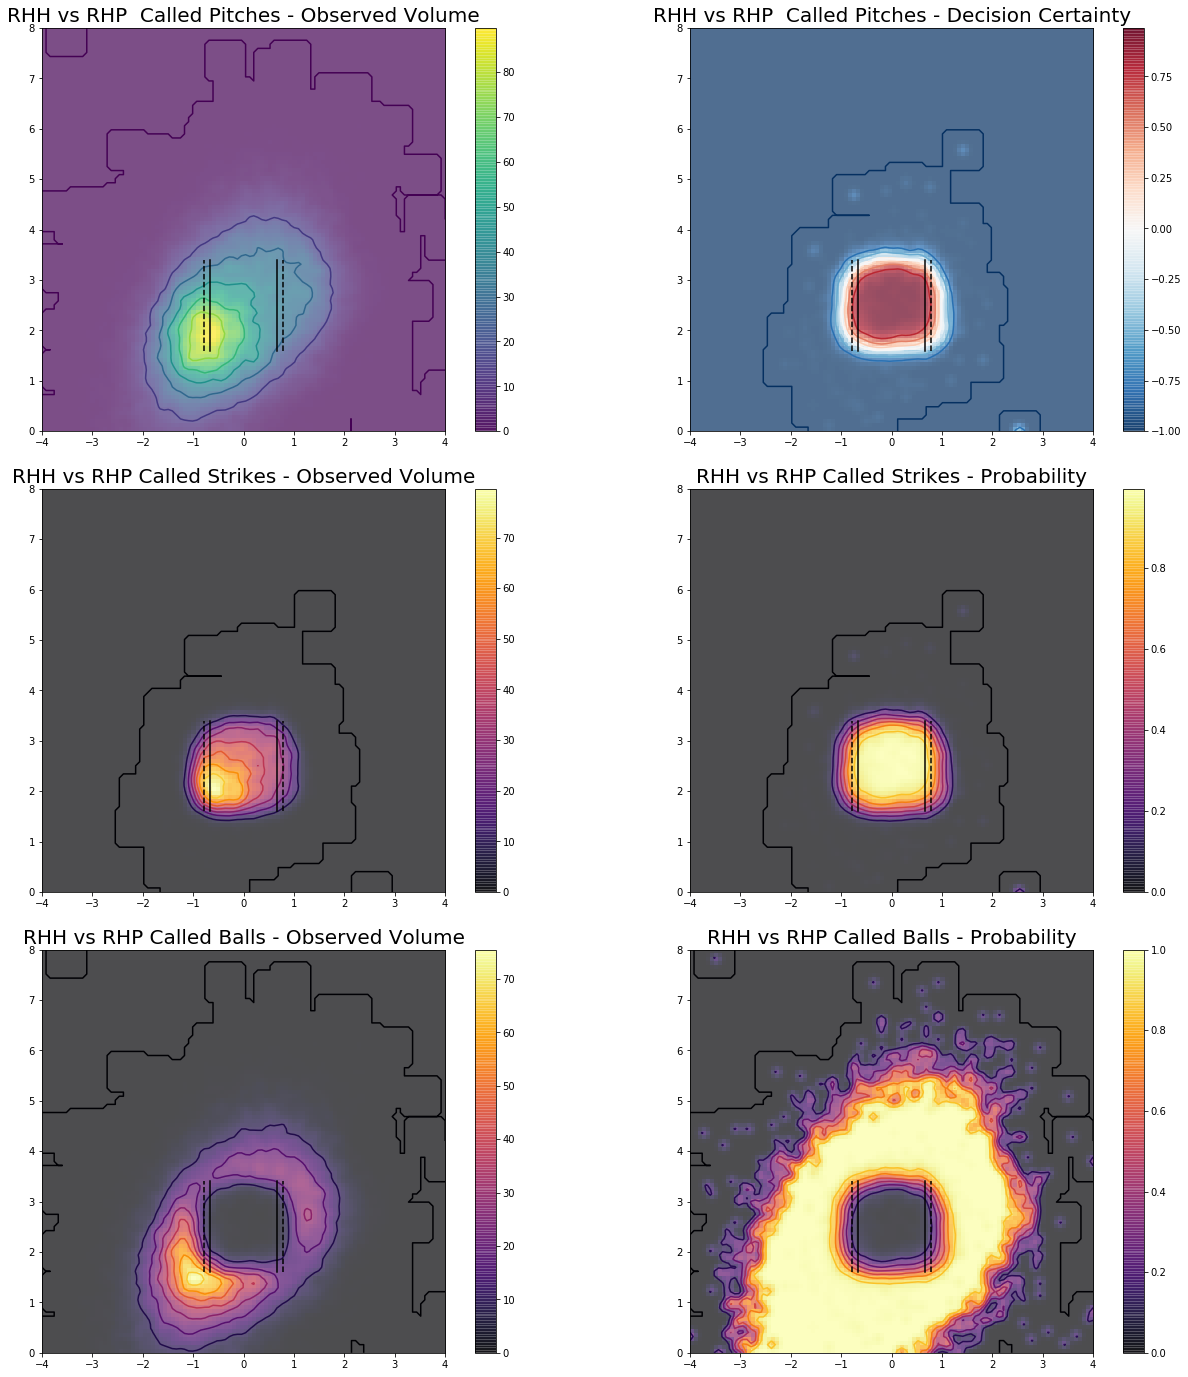

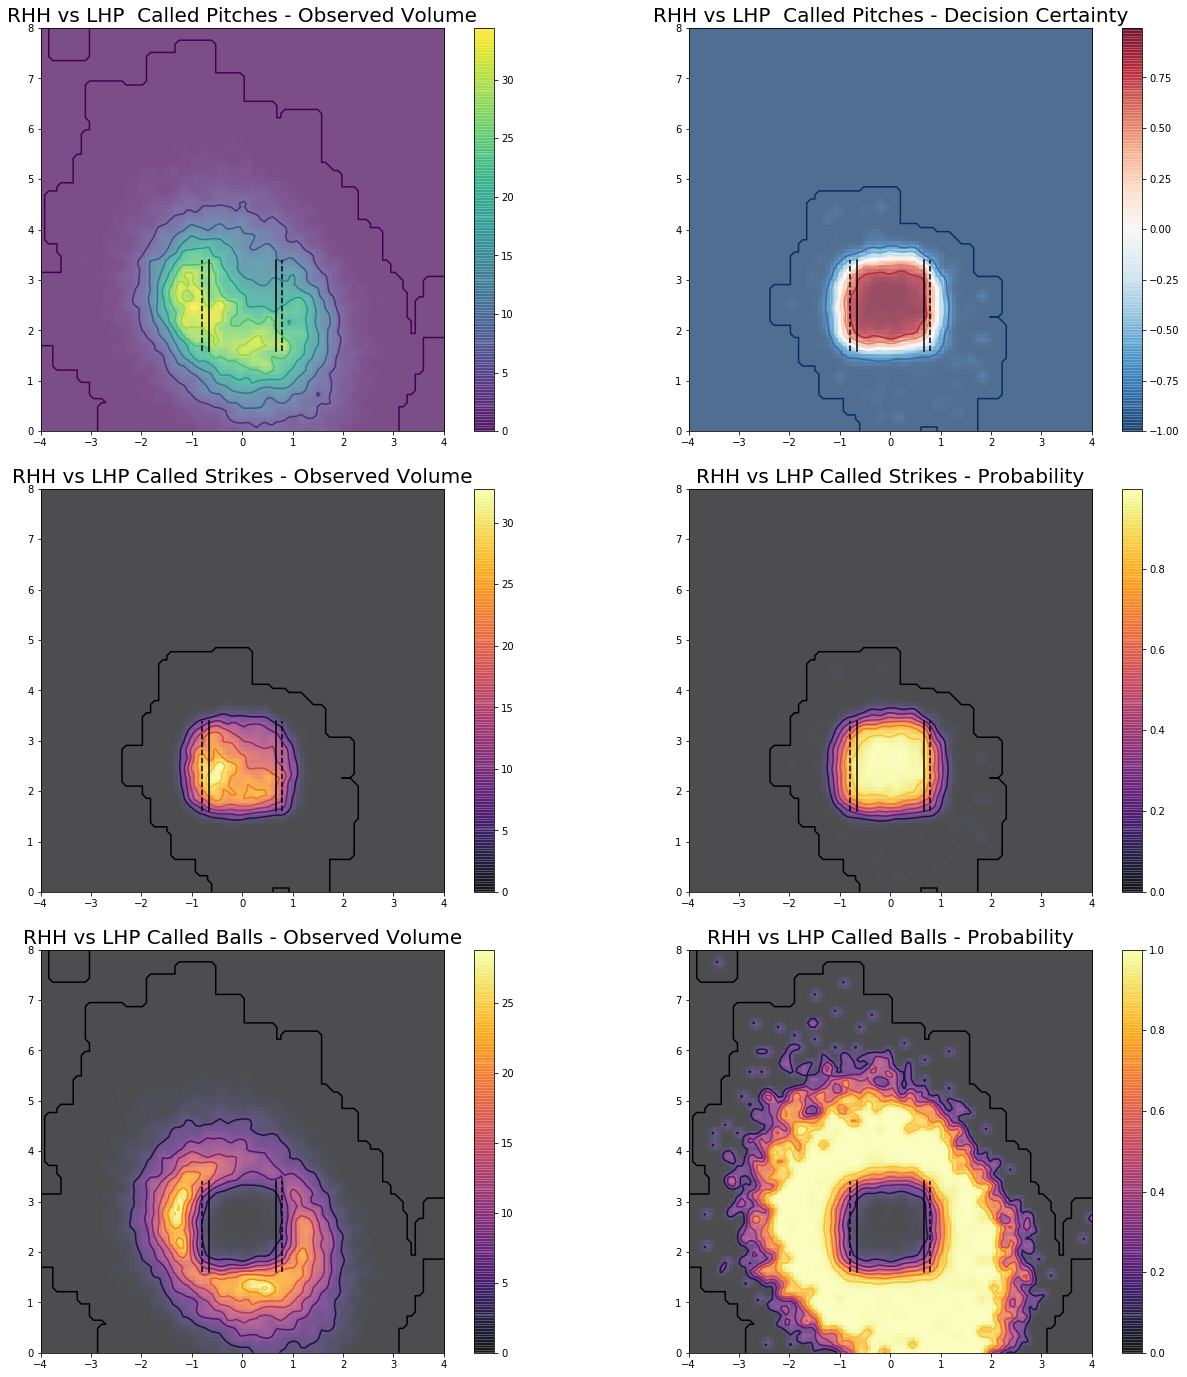

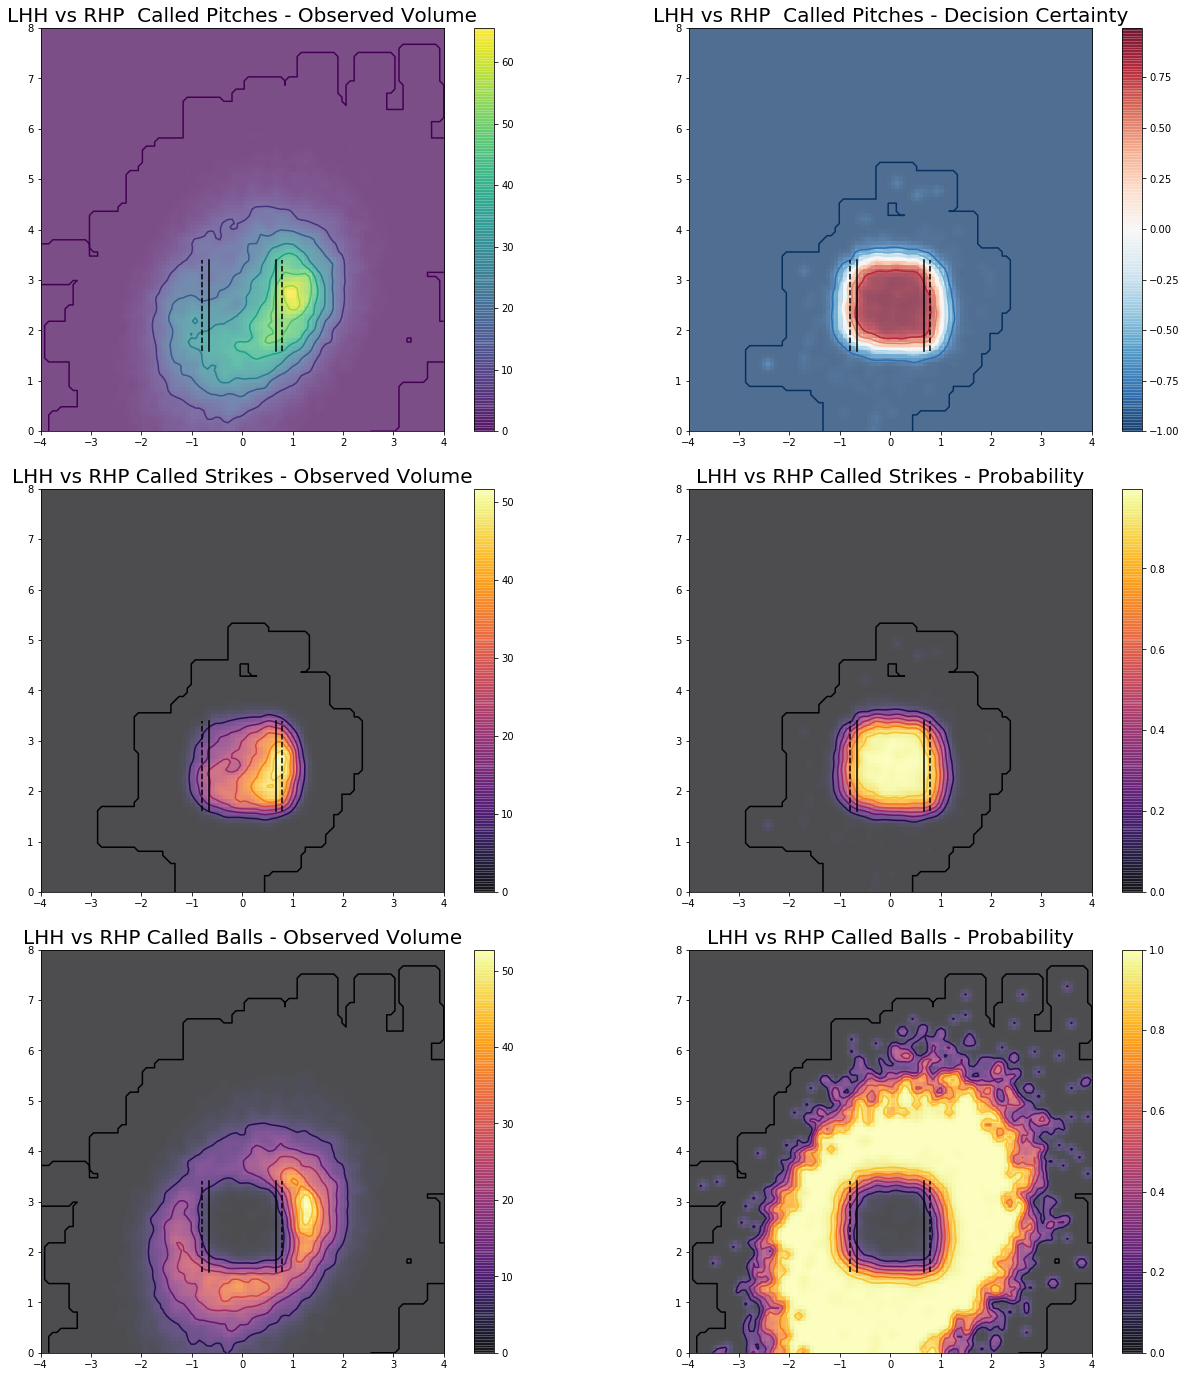

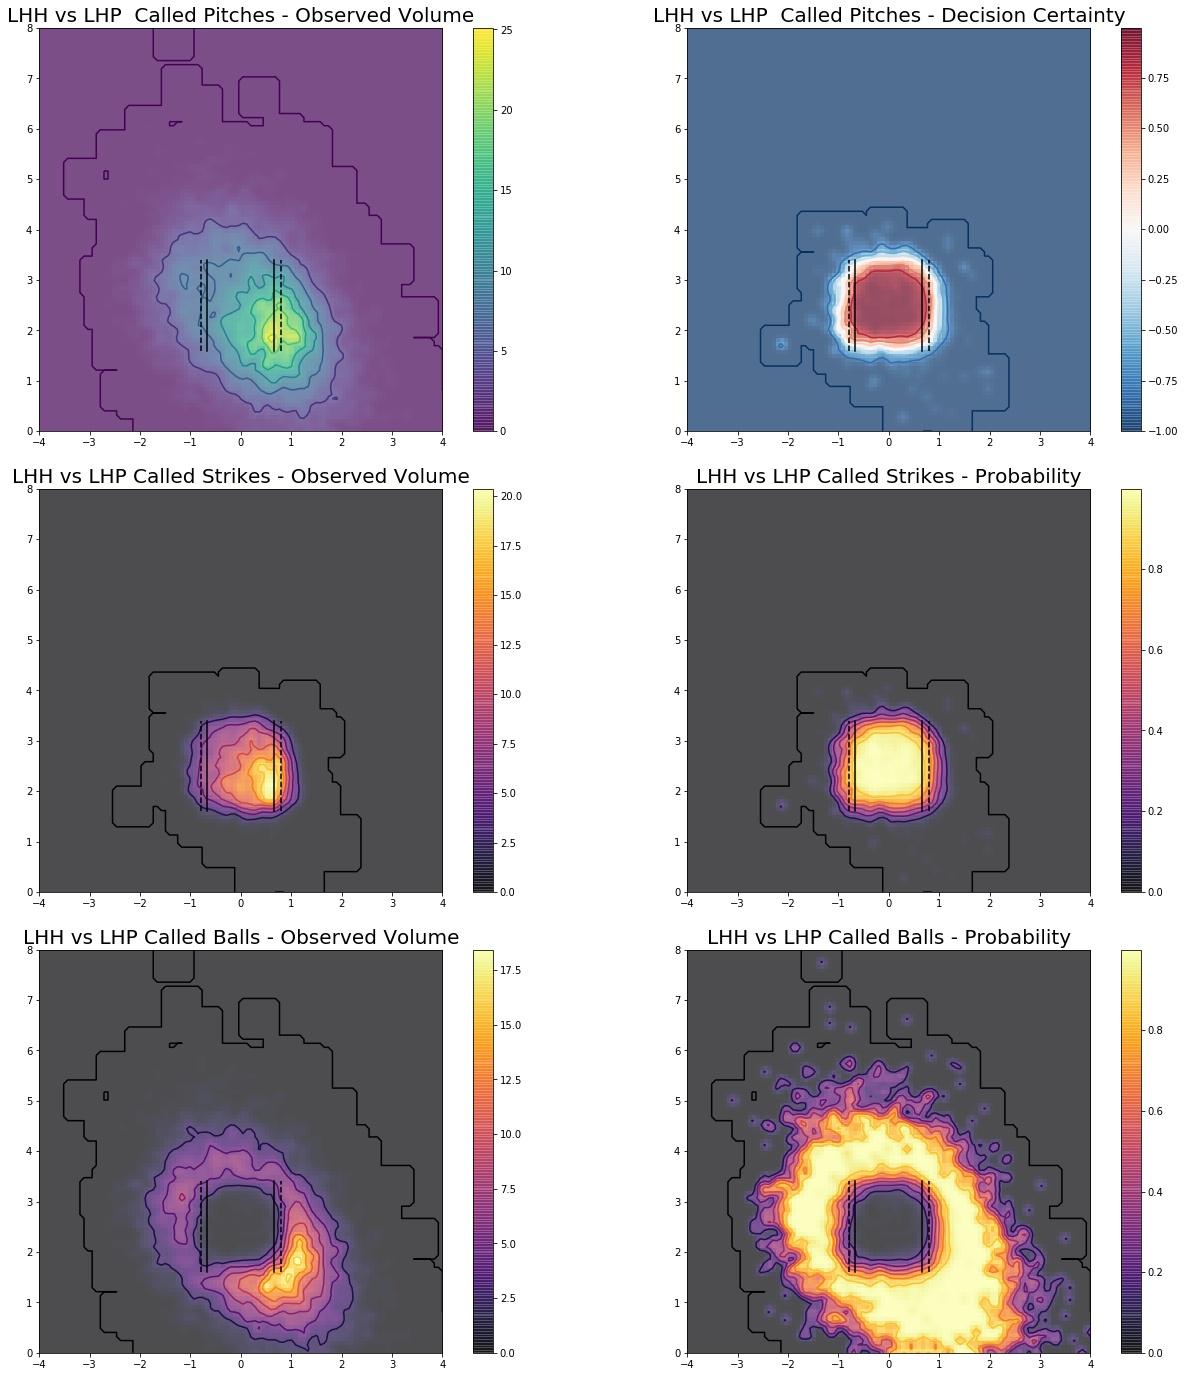

In [22]:

for side in ['RHH','LHH']:
    for pit in ['RHP','LHP']:
        
        if side == 'RHH':
            batside = ['R']
        elif side == 'LHH':
            batside = ['L']
        
        if pit == 'RHP':
            pitcherhand = ['R']
        elif pit == 'LHP':
            pitcherhand = ['L']
            
        all_pitches = df[(df['batside'].isin(batside)) & (df['pitcherhand'].isin(pitcherhand))]

        bins=100
        alpha = 0.7

        fig = plt.figure()
        ax31 = fig.add_axes([0., 0., 1.4, 1.4, ])
        ax31.set_title('{} vs {} Called Balls - Observed Volume'.format(side, pit), fontdict={'fontsize': 20})
        ax32 = fig.add_axes([1.5, 0., 1.4, 1.4, ])
        ax32.set_title('{} vs {} Called Balls - Probability'.format(side, pit), fontdict={'fontsize': 20})
        ax21 = fig.add_axes([0., 1.6, 1.4, 1.4, ])
        ax21.set_title('{} vs {} Called Strikes - Observed Volume'.format(side, pit), fontdict={'fontsize': 20})
        ax22 = fig.add_axes([1.5, 1.6, 1.4, 1.4, ])
        ax22.set_title('{} vs {} Called Strikes - Probability'.format(side, pit), fontdict={'fontsize': 20})
        ax11 = fig.add_axes([0., 3.2, 1.4, 1.4, ])
        ax11.set_title('{} vs {}  Called Pitches - Observed Volume'.format(side, pit), fontdict={'fontsize': 20})
        ax12 = fig.add_axes([1.5, 3.2, 1.4, 1.4, ])
        ax12.set_title('{} vs {}  Called Pitches - Decision Certainty'.format(side, pit), fontdict={'fontsize': 20})

        x = np.linspace(-4.,4.,bins)
        y = np.linspace(8,0,bins)
        X, Y = np.meshgrid(x,y)



        strikes_map, balls_map, totals_map, strike_probabilites_map, balls_probabilites_map, probabilities_difference_map, totals_map_all_pitches = prepare_dataset(
            all_pitches)
        ax11 = make_zone_subplot(totals_map, fig, ax11, cmap='viridis', contour_X=X, contour_Y=Y)
        ax12 = make_zone_subplot(probabilities_difference_map, fig, ax12, cmap='RdBu_r', contour_X=X, contour_Y=Y)
        ax21 = make_zone_subplot(strikes_map, fig, ax21, cmap='inferno', contour_X=X, contour_Y=Y)
        ax22 = make_zone_subplot(strike_probabilites_map, fig, ax22, cmap='inferno', contour_X=X, contour_Y=Y)
        ax31 = make_zone_subplot(balls_map, fig, ax31, cmap='inferno', contour_X=X, contour_Y=Y)
        ax32 = make_zone_subplot(balls_probabilites_map, fig, ax32, cmap='inferno', contour_X=X, contour_Y=Y)

        fig.show()

### Look at difference between LHH and RHH

/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


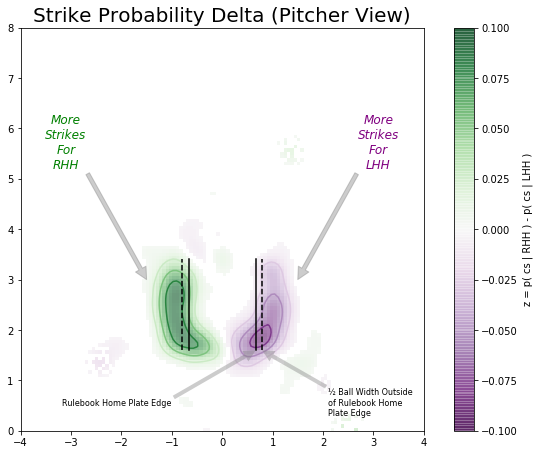

In [23]:
fig = plt.figure()
#ax1 = fig.add_axes([0., 0., 1.4, 1.4, ])
#ax1.set_title('LHH Strike Probabilities', fontdict={'fontsize': 20})

ax2 = fig.add_axes([1.3, 0., 1.4, 1.4, ])
ax2.set_title('Strike Probability Delta (Pitcher View)', fontdict={'fontsize': 20})

#ax3 = fig.add_axes([2.6, 0., 1.4, 1.4, ])
#ax3.set_title('RHH Strike Probabilities', fontdict={'fontsize': 20})

alpha = 0.6
bins=120
s=2.8


x = np.linspace(-4.,4.,bins)
y = np.linspace(8,0,bins)
X, Y = np.meshgrid(x,y)

_, _, _, strike_probabilites_map_r, _, _, _ = prepare_dataset(called_pitches[(called_pitches['batside'] == 'R')], bins=bins, s=s)
#ax3, fig = make_zone_subplot(strike_probabilites_map_r, fig, ax3, cmap='Greens', contour_X=X, contour_Y=Y, vmin=0., vmax=1.0, alpha=alpha)

_, _, _, strike_probabilites_map_l, _, _, totals_map_all_pitches = prepare_dataset(called_pitches[called_pitches['batside'] == 'L'], bins=bins, s=s)
#ax1, fig = make_zone_subplot(strike_probabilites_map_l, fig, ax1, cmap='Purples', contour_X=X, contour_Y=Y, vmin=0., vmax=1.0, alpha=alpha)

strike_probabilities_delta = (strike_probabilites_map_r - strike_probabilites_map_l)
strike_probabilities_delta[totals_map_all_pitches < 1] = np.nan
strike_probabilities_delta[np.abs(strike_probabilities_delta) < 0.005] = np.nan
norm = cm.colors.Normalize(vmax=abs(strike_probabilities_delta).max(), vmin=-abs(strike_probabilities_delta).max())
ax2, fig = make_zone_subplot(strike_probabilities_delta, fig, ax2, cmap='PRGn', contour_X=X, contour_Y=Y, norm=norm, alpha=alpha, cbar_label='z = p( cs | RHH ) - p( cs | LHH )', legend=True)

text_args = {'fontweight':'ultralight', 'fontsize':12, 'horizontalalignment':'center', 'fontstyle':'italic'}

arrowprops = {'color':'grey','alpha':0.4}
ax2.annotate('More\nStrikes\nFor\nRHH', (-1.5,3.0), xytext=(-3.1,5.2), arrowprops=arrowprops, color='green', **text_args)
ax2.annotate('More\nStrikes\nFor\nLHH', (1.5,3.0), xytext=(3.1,5.2), arrowprops=arrowprops, color='purple', **text_args)

text2_args = {'fontweight':'ultralight', 'fontsize':8}
arrowprops = {'color':'grey','alpha':0.4, 'linewidth':0.001}
ax2.annotate('Rulebook Home Plate Edge', (2./3,1.6), xytext=(-1.,0.5), arrowprops=arrowprops, color='black', **text2_args, horizontalalignment='right')
ax2.annotate('½ Ball Width Outside\nof Rulebook Home\nPlate Edge', (2./3+1.5/12,1.6), xytext=(2.1,0.3), arrowprops=arrowprops, color='black', **text2_args, horizontalalignment='left')

#plt.savefig('strike_zone_delta.svg')
plt.show()

# Excusion into Fastballs vs. Breaking Balls/Offspead

In [24]:
def is_strike_or_out(df):
    if (df['calledstrike'] == 1) or (df['swings'] == 1 and df['inplay'] == 0) or (df['swings'] == 1 and df['pitcheventtype'] == 'hit_into_play_out') is True:
        return 1
    else:
        return 0

In [25]:
df['strike_or_out'] = df.apply(is_strike_or_out, axis=1)

In [26]:
def prepare_dataset_outcomes(swinging_pitches, bins=100, s=1):
    
    fastballs = swinging_pitches[swinging_pitches['pitchtype'].isin(['FA','FC','FS','SI'])][['plate_x','plate_z','strike_or_out']]
    breaking_balls = swinging_pitches[swinging_pitches['pitchtype'].isin(['CH','CU','SL','SC','KN'])][['plate_x','plate_z','strike_or_out']]

    fastballs_map, fastballs_xedges, fastballs_yedges = make_heatmap(fastballs['plate_x'].values, fastballs['plate_z'].values, bins=bins)
    fastballs_map = np.flip(fastballs_map.T,axis=0)
    breaking_balls_map, _, _ = make_heatmap(breaking_balls['plate_x'].values, breaking_balls['plate_z'].values, bins=bins)
    breaking_balls_map = np.flip(breaking_balls_map.T,axis=0)

    totals_map = fastballs_map + breaking_balls_map
    totals_normed_map = totals_map / swinging_pitches.shape[0]

    fastballs_probabilites_map = np.nan_to_num(fastballs_map / totals_map)
    breaking_balls_probabilities_map = np.nan_to_num(breaking_balls_map / totals_map)

    probabilities_difference_map = fastballs_probabilites_map - breaking_balls_probabilities_map

    fastballs_map = gaussian_filter(fastballs_map, sigma=s)
    breaking_balls_map = gaussian_filter(breaking_balls_map, sigma=s)
    totals_normed_map = gaussian_filter(totals_map, sigma=s)
    fastballs_probabilites_map = gaussian_filter(fastballs_probabilites_map, sigma=s)
    breaking_balls_probabilities_map = gaussian_filter(breaking_balls_probabilities_map, sigma=s)
    probabilities_difference_map = gaussian_filter(probabilities_difference_map, sigma=s)

    #strike_probabilites_map[strikes_map < 2] = np.nan
    #balls_probabilites_map[balls_map < 2] = np.nan
    #probabilities_difference_map[totals_map < 20] = np.nan
    #totals_map[totals_map < 20] = np.nan
    #strikes_map[strikes_map < 2] = np.nan
    #balls_map[balls_map < 2] = np.nan
    
    return fastballs_map, breaking_balls_map, totals_normed_map, fastballs_probabilites_map, breaking_balls_probabilities_map, probabilities_difference_map, totals_map

/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/dangoldberg/miniconda3/envs/tbj/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel

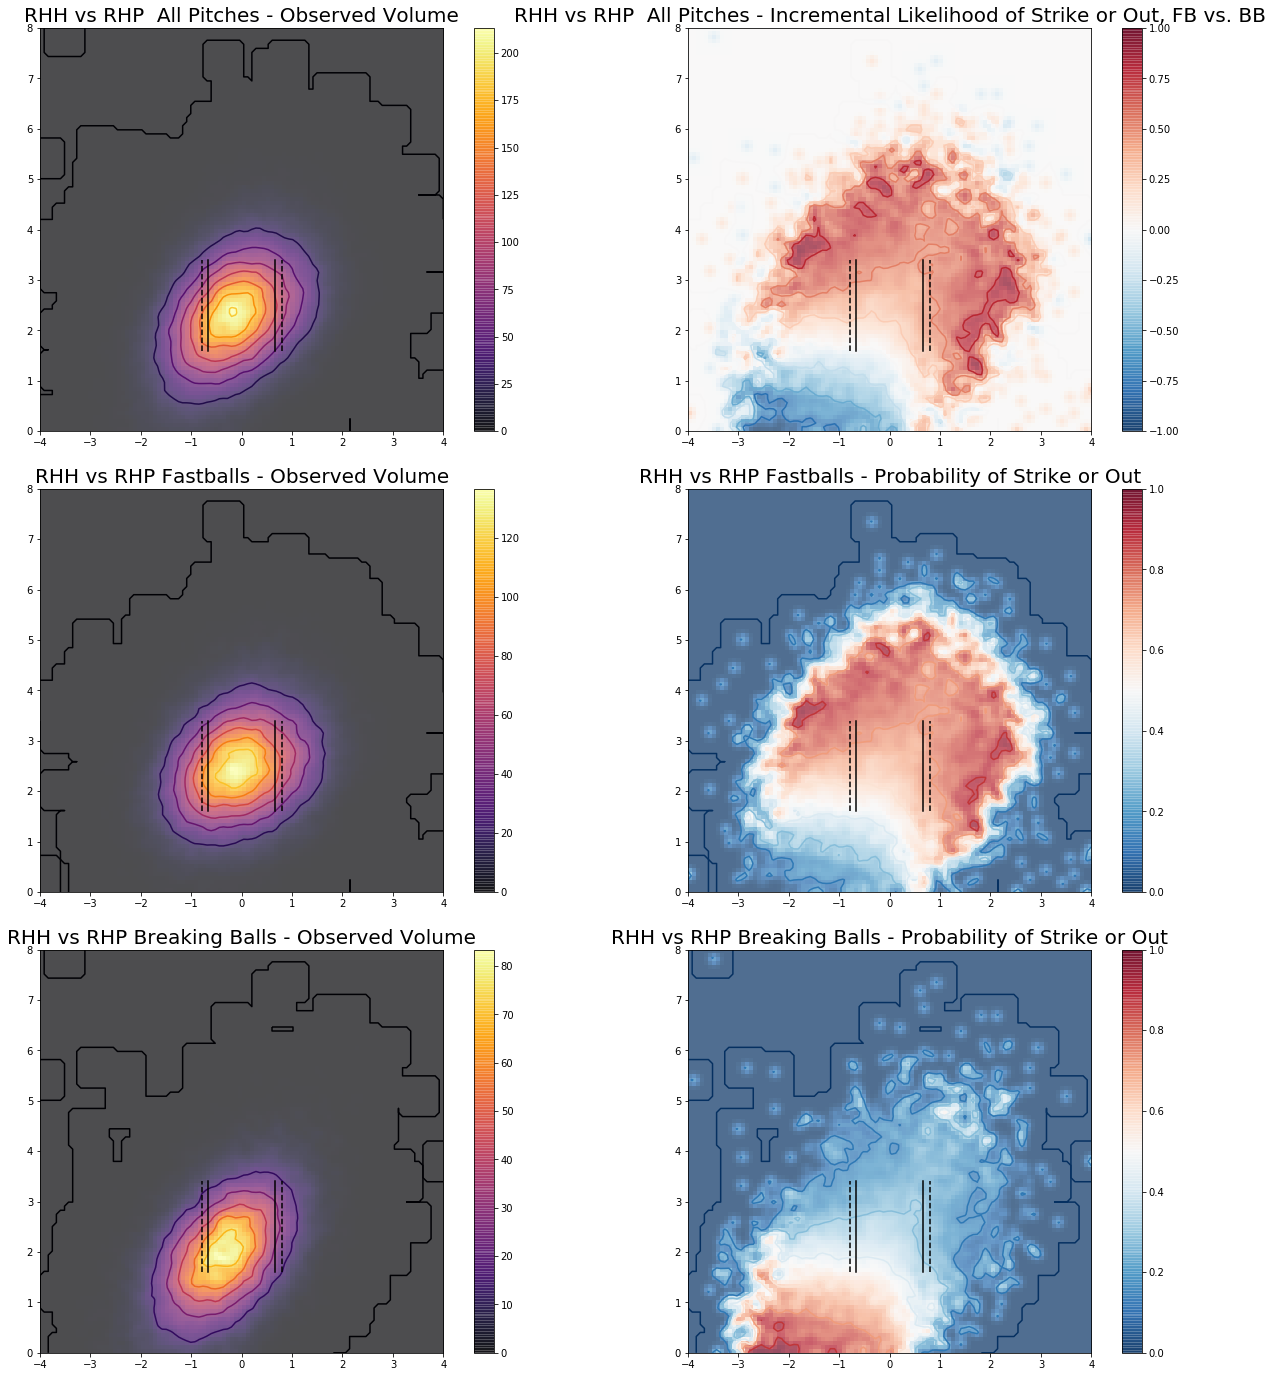

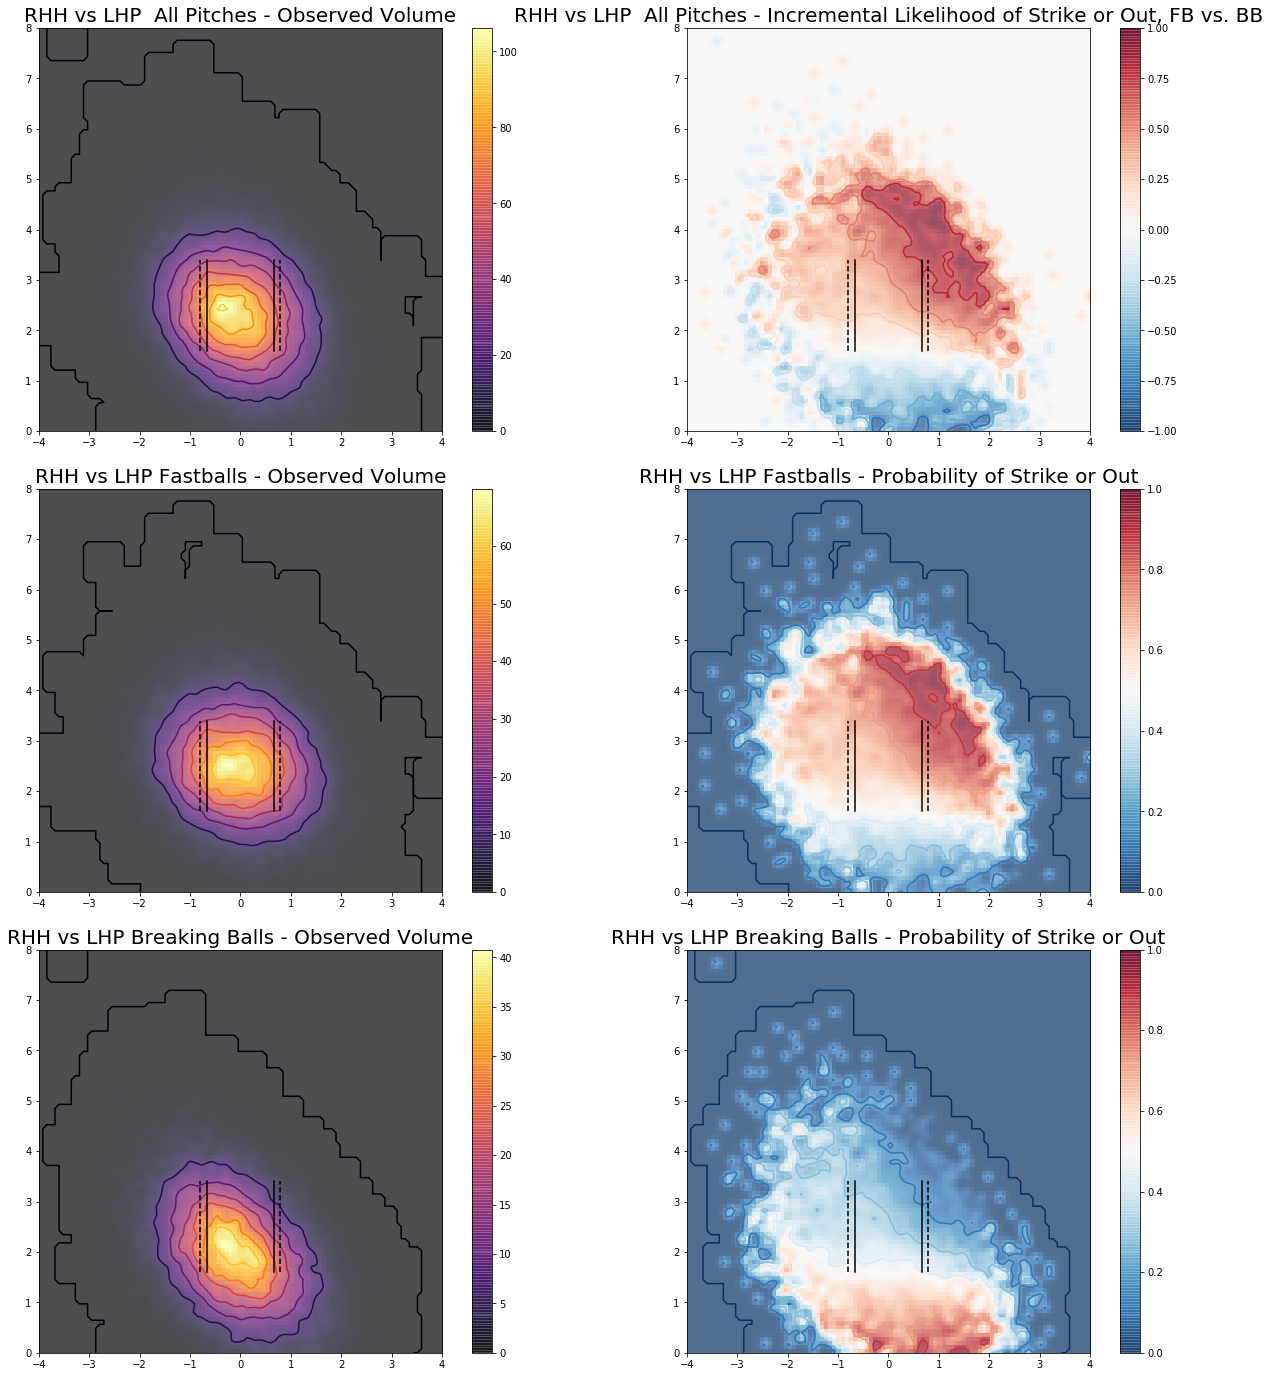

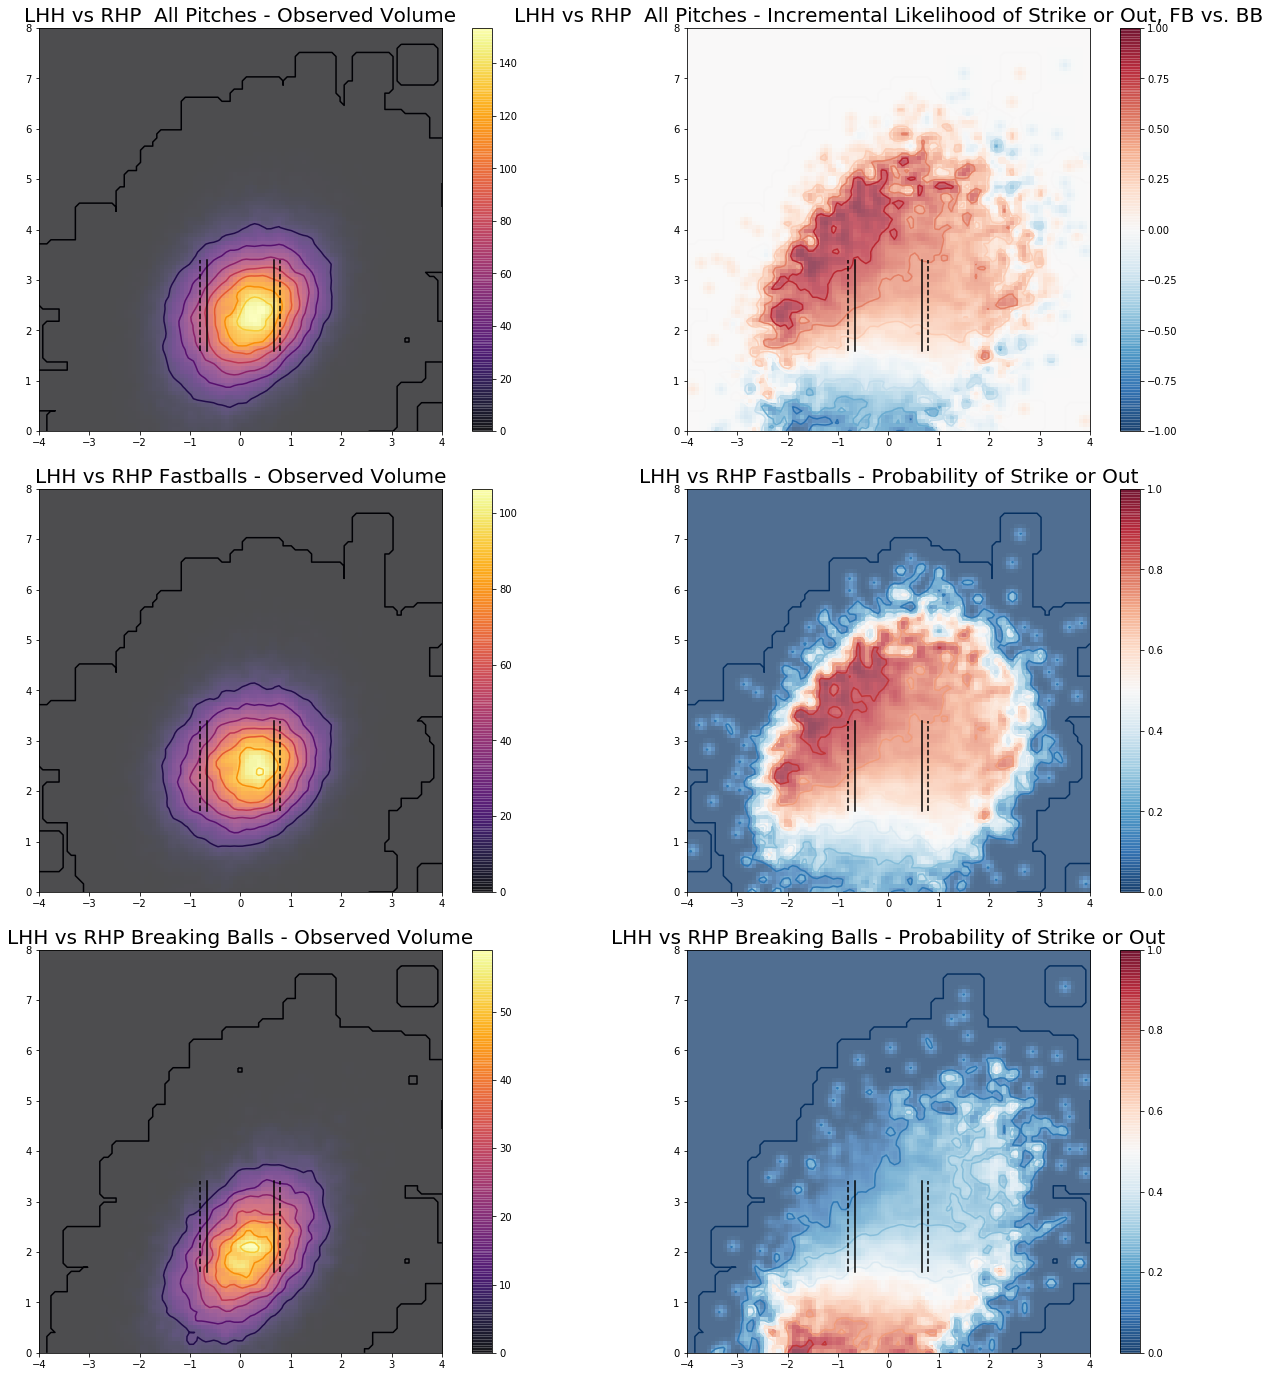

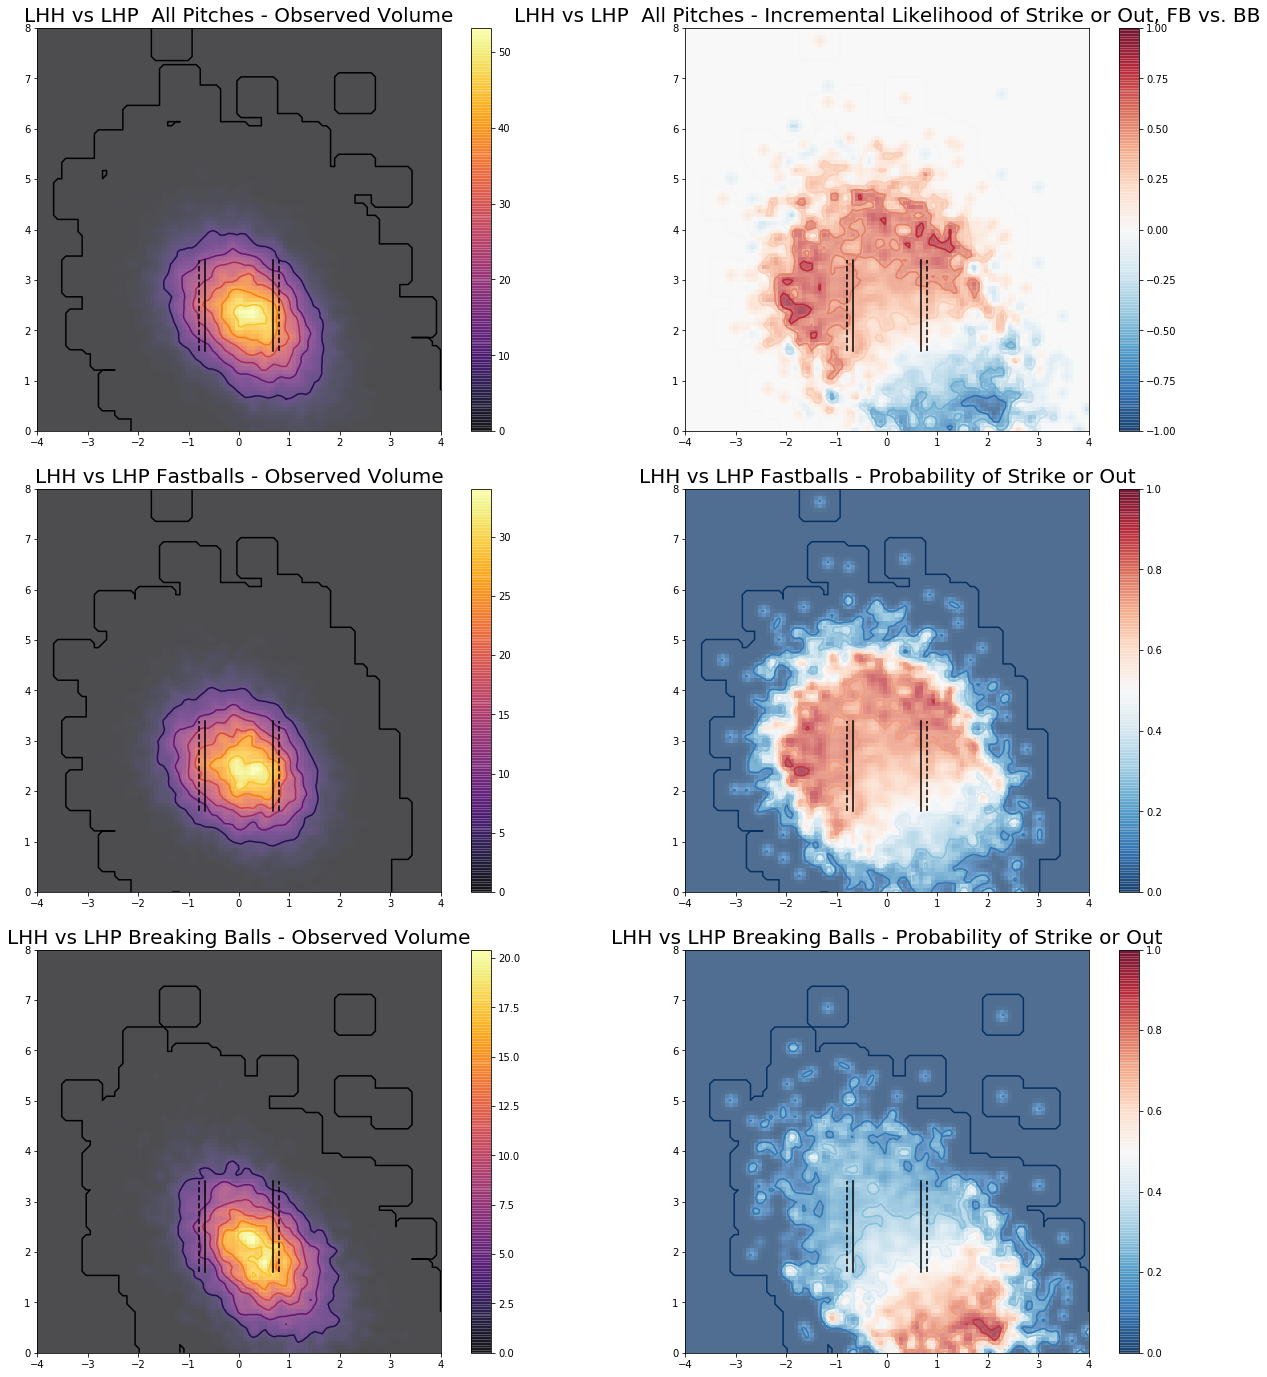

In [27]:

for side in ['RHH','LHH']:
    for pit in ['RHP','LHP']:
        
        if side == 'RHH':
            batside = ['R']
        elif side == 'LHH':
            batside = ['L']
        
        if pit == 'RHP':
            pitcherhand = ['R']
        elif pit == 'LHP':
            pitcherhand = ['L']
            
        outcomes = df[(df['batside'].isin(batside)) & (df['pitcherhand'].isin(pitcherhand))]

        bins=100
        alpha = 0.7
        s=1

        fig = plt.figure()
        ax31 = fig.add_axes([0., 0., 1.4, 1.4, ])
        ax31.set_title('{} vs {} Breaking Balls - Observed Volume'.format(side, pit), fontdict={'fontsize': 20})
        ax32 = fig.add_axes([1.5, 0., 1.4, 1.4, ])
        ax32.set_title('{} vs {} Breaking Balls - Probability of Strike or Out'.format(side, pit), fontdict={'fontsize': 20})
        ax21 = fig.add_axes([0., 1.6, 1.4, 1.4, ])
        ax21.set_title('{} vs {} Fastballs - Observed Volume'.format(side, pit), fontdict={'fontsize': 20})
        ax22 = fig.add_axes([1.5, 1.6, 1.4, 1.4, ])
        ax22.set_title('{} vs {} Fastballs - Probability of Strike or Out'.format(side, pit), fontdict={'fontsize': 20})
        ax11 = fig.add_axes([0., 3.2, 1.4, 1.4, ])
        ax11.set_title('{} vs {}  All Pitches - Observed Volume'.format(side, pit), fontdict={'fontsize': 20})
        ax12 = fig.add_axes([1.5, 3.2, 1.4, 1.4, ])
        ax12.set_title('{} vs {}  All Pitches - Incremental Likelihood of Strike or Out, FB vs. BB'.format(side, pit), fontdict={'fontsize': 20})

        x = np.linspace(-4.,4.,bins)
        y = np.linspace(8,0,bins)
        X, Y = np.meshgrid(x,y)



        fastballs_map, breaking_balls_map, totals_map, fastballs_probabilites_map, breaking_balls_probabilities_map, probabilities_difference_map, totals_map_all_pitches = prepare_dataset_outcomes(
            outcomes, s=s)
        ax11 = make_zone_subplot(totals_map, fig, ax11, cmap='inferno', contour_X=X, contour_Y=Y)
        ax12 = make_zone_subplot(probabilities_difference_map, fig, ax12, cmap='RdBu_r', contour_X=X, contour_Y=Y, vmax=1.0, vmin=-1.0)
        ax21 = make_zone_subplot(fastballs_map, fig, ax21, cmap='inferno', contour_X=X, contour_Y=Y)
        ax22 = make_zone_subplot(fastballs_probabilites_map, fig, ax22, cmap='RdBu_r', contour_X=X, contour_Y=Y, vmax=1.0, vmin=0.0)
        ax31 = make_zone_subplot(breaking_balls_map, fig, ax31, cmap='inferno', contour_X=X, contour_Y=Y)
        ax32 = make_zone_subplot(breaking_balls_probabilities_map, fig, ax32, cmap='RdBu_r', contour_X=X, contour_Y=Y, vmax=1.0, vmin=0.0)

        fig.show()